--------
## Step 1: Pseudocode/Algorithm
[Latex Source](https://www.overleaf.com/6663695rcdbbh#/22616031/)

### Summary of Pseudocode of using the Meidan to Remove Outliers:

i. INPUT - eeg_data array. 2D in simulation and 4D in the actual data, but the 2 extra dimensions are for the convenience of keeping track of trial and patient number and can be easily disregarded.   
- Note that the dimensions must be in the order of eeg_data[timesteps, electrodes] and the additional two dimensions are [trial, patient number] if needed.  
ii. OUTPUT - Produces a 1-D array containing the eigenvalues and the eigenvectors obtained by having a robust covariance matrix.  
iii. Function Name - "FindVar" - stands for find variance / eigenvalues etc

#### iv. Step by Step Instructions
1. The code first removes outliers on the timesteps (or the voltage values) using the method remove_outliers, which turns any data that are 3 Median Absolute Deviation away from the Median into "NaN".  

- Median Absolute Deviation is defined as the absolute value of distance between the data value and the median.  
2. The 'NaN' in the data is masked using the np.ma.array() function. Then a robust covariance matrix is generated using the np.ma.cov() function. Masking the 'NaN's allow a covariance matrix to be generated even considering the absence of some data.  
3. The eigenvalues and eigenvectors are calculated using the LinAlg function.  

--------
## Step 2: Simulations & Details of Their Parameters

##### Success
- Some data is generated and outliers with huge distances from the median are added. The function should be able to remove all data that are more than three median absolute deviant away from the median.

##### Failure
- For data such as a normal distribution, the mean is preferred. The median will not be as great of an estimator of the data.

-------
## Step 3: Choose Visualization
- We will use a scatter plot in which the EEG data are shown- the pre-processed graph and the post-removing outlier graph will be shown on the same plot. 

- We will also print the pre and post-removing outlier covariance matrix to compare the two and see how they're different.

- We will also graph the eigenvectors associated with this covariance and see the difference.

-------
## Step 4: Specify Metrics for Evaluating Performance
We will use the *truth* function, which returns 1 if the post-processed graph removes all the noises and returns the signal and 0 if they do not. 

------
## Step 5: Write Code Generating Simulated Data

### Success (EEG Data)

In [58]:
import numpy as np
import h5py
import pandas as pd 
import matplotlib.pyplot as plt

## We will generate the original array
x = np.array([[0,1] , [1,2] , [0.5,0.5], [0.25,0], [0.75,1]], np.float32)
## Generate Outliers
y = np.array([[4,4], [-5,5], [-6,6]])
## Combine them
z = np.vstack((x,y))
print z.shape

(8L, 2L)


### Failure (Random Matrix)

In [59]:
mu_vec2 = np.array([1,1])
cov_mat2 = np.array([[1,0],[0,1]])
norms = np.random.multivariate_normal(mu_vec2, cov_mat2, 8)
print norms.shape

(8L, 2L)


----------
## Step 7: Plot Simulated Data

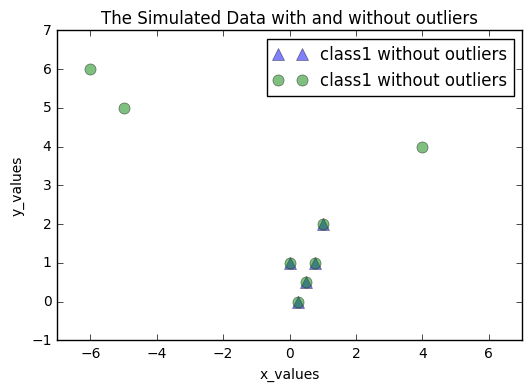

In [42]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

plt.plot(x[:,0], x[:,1], '^', markersize=8, color='blue', alpha=0.5, label='class1 without outliers')
plt.plot(z[:,0], z[:,1], 'o', markersize=8, color='green', alpha=0.5, label='class1 without outliers')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-7,7])
plt.ylim([-1,7])
plt.legend()
plt.title('The Simulated Data with and without outliers')
plt.show()

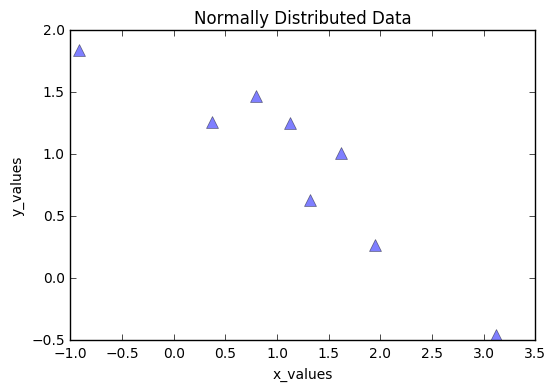

In [61]:
plt.plot(norms[:,0], norms[:,1],  '^', markersize=8, color='blue', alpha=0.5)
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.title('Normally Distributed Data')
plt.show()

Note: The Purple curve is shown as the outlier or the "noise". 

---------
## Step 8: Write Algorithm Code

In [35]:
import sklearn

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from scipy import stats
from sklearn.preprocessing import scale
import statsmodels
from statsmodels import robust

In [49]:
from matplotlib import pyplot as mp
import numpy as np
import math

def remove_outliers(data):
    filtered = []
    m = 3
    u = np.median(data)
    s = robust.mad(data, c = 1, axis = 0 )
    print ("The Median of the Data and the Median Absolute Deviant, Respectively")
    for e in range(data.shape[0]):
        if u-3*s < data[e] < u+3*s:
            filtered.append(data[e])
        else:
            filtered.append(np.nan)
    return filtered

print(x)
print(z)

[[ 0.    1.  ]
 [ 1.    2.  ]
 [ 0.5   0.5 ]
 [ 0.25  0.  ]
 [ 0.75  1.  ]]
[[ 0.    1.  ]
 [ 1.    2.  ]
 [ 0.5   0.5 ]
 [ 0.25  0.  ]
 [ 0.75  1.  ]
 [ 4.    4.  ]
 [-5.    5.  ]
 [-6.    6.  ]]


In [89]:
        def robustPCA(eeg_data):
                new_data = []
                for c in range(eeg_data.shape[1]):
                    if new_data == []:
                        temp = remove_outliers(eeg_data[:,c])
                        new_data = temp
                    else:
                        temp = remove_outliers(eeg_data[:,c])
                        new_data = np.vstack((new_data, temp))
                print ("Matrix Created After Removing the Median Absolute Deviant")
                print (new_data)
                print "\n"
                maskedarr = np.ma.array(new_data, mask=np.isnan(new_data))
                print maskedarr
                cov_mat = np.ma.cov(maskedarr,rowvar=False,allow_masked=True)
                print "Robust Covariance Matrix:"
                print cov_mat
                print "\n"

                ##Defining Eigenvalues and Eigenvectors

                eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
                numTimesteps = len(eeg_data[:,0])
                numElectrodes = len(eeg_data[0,:])
                for i in range(len(eig_val_cov)):
                    eigvec_cov = eig_vec_cov[:,i].reshape(1,numTimesteps).T
                    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
                    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
                    print('\n')
                eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
                eig_pairs.sort(key=lambda x: x[0], reverse=True)
                matrix_w = eig_pairs[0][1].reshape(numTimesteps,1)
                for x in range(0, 1):
                    matrix_w = np.hstack((matrix_w, eig_pairs[x][1].reshape(numTimesteps,1)))
                    #print matrix_w
                eeg_data = matrix_w.T.dot(eeg_data)
                print ("The Post-RPCA Matrix")
                print eeg_data
                return eig_val_cov

## A Summary of the Results Printed for the Success Case

In [90]:
EigenvaluesZ = robustPCA(z)
EigenvaluesX = robustPCA(x)

The Median of the Data and the Median Absolute Deviant, Respectively
The Median of the Data and the Median Absolute Deviant, Respectively
Matrix Created After Removing the Median Absolute Deviant
[[ 0.    1.    0.5   0.25  0.75   nan   nan   nan]
 [ 1.    2.    0.5   0.    1.    4.    5.     nan]]


[[0.0 1.0 0.5 0.25 0.75 -- -- --]
 [1.0 2.0 0.5 0.0 1.0 4.0 5.0 --]]
Robust Covariance Matrix:
[[0.5 0.5 0.0 -0.125 0.125 -- -- --]
 [0.5 0.5 0.0 -0.125 0.125 -- -- --]
 [0.0 0.0 0.0 0.0 0.0 -- -- --]
 [-0.125 -0.125 0.0 0.03125 -0.03125 -- -- --]
 [0.125 0.125 0.0 -0.03125 0.03125 -- -- --]
 [-- -- -- -- -- -- -- --]
 [-- -- -- -- -- -- -- --]
 [-- -- -- -- -- -- -- --]]


Eigenvector 1: 
[[-0.7276068751089989]
 [0.6467616667635546]
 [0.0]
 [-0.16169041669088868]
 [0.16169041669088868]
 [--]
 [--]
 [--]]
Eigenvalue 1 from covariance matrix: -1.11022302463e-16


Eigenvector 2: 
[[-0.6859943405700355]
 [-0.6859943405700352]
 [0.0]
 [0.17149858514250885]
 [-0.17149858514250885]
 [--]
 [--]
 [

## A Summary of the Results Printed for the Failure Case

In [110]:
cov_mat_norms = np.cov
EigenvaluesNorm = robustPCA(norms)

(8L, 2L)
The Median of the Data and the Median Absolute Deviant, Respectively
The Median of the Data and the Median Absolute Deviant, Respectively
Matrix Created After Removing the Median Absolute Deviant
[[ 1.61508976  0.79322543  0.37388628  1.94739821  1.32074557         nan
          nan  1.12857669]
 [ 1.00915685  1.46773922  1.25935543  0.26923486  0.63595151  1.83890331
          nan  1.2542343 ]]


[[1.6150897590719038 0.7932254310862042 0.37388628042093874
  1.9473982059882697 1.3207455729174922 -- -- 1.128576687075764]
 [1.0091568483314843 1.4677392245746952 1.2593554252775796
  0.26923485750828113 0.6359515146980249 1.8389033066086486 --
  1.2542343041760844]]
Robust Covariance Matrix:
[[0.18357734615917856 -0.20435505311152175 -0.26826744815690723
  0.5084272012211841 0.20746962847733302 -- -- -0.038070042843151096]
 [-0.20435505311152175 0.2274844288031173 0.29863057595713144
  -0.5659721631382927 -0.23095151898399569 -- -- 0.04237889799553066]
 [-0.26826744815690723 0.298

------
## Step 9: Write Qualitative Evaluation Code, Run Qualitative Evaluation

### Success

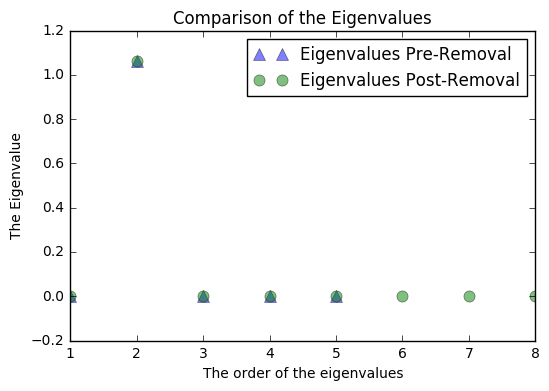

In [107]:
#Cumulative Variance explains
RangeOfEigenvaluesX = range(1, len(EigenvaluesX) +1)
RangeOfEigenvaluesZ = range(1, len(EigenvaluesZ)+1)
plt.plot(RangeOfEigenvaluesX, EigenvaluesX, '^', markersize=8, color='blue', alpha=0.5, label='Eigenvalues Pre-Removal')
plt.plot(RangeOfEigenvaluesZ, EigenvaluesZ, 'o', markersize=8, color='green', alpha=0.5, label='Eigenvalues Post-Removal')
plt.xlabel('The order of the eigenvalues')
plt.ylabel('The Eigenvalue')
plt.legend()
plt.title('Comparison of the Eigenvalues')
plt.show()

### Failure

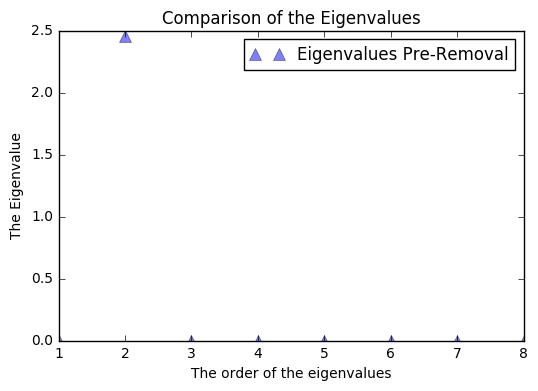

In [108]:
RangeOfEigenvaluesNorm = range(1, len(EigenvaluesNorm) +1)
RangeOfEigenvaluesZ = range(1, len(EigenvaluesZ)+1)
plt.plot(RangeOfEigenvaluesNorm, EigenvaluesNorm, '^', markersize=8, color='blue', alpha=0.5, label='Eigenvalues Pre-Removal')
plt.xlabel('The order of the eigenvalues')
plt.ylabel('The Eigenvalue')
plt.legend()
plt.title('Comparison of the Eigenvalues')
plt.show()

## Step 12: Quantitative Evaluation

In [73]:
def truth(i):
    a = robustPCA(z)
    print a
    b = robustPCA(x)
    print b
    if a[0] == b[0]:
        return "true"
    else:
        return "false"

truth(1)

The Median of the Data and the Median Absolute Deviant, Respectively
The Median of the Data and the Median Absolute Deviant, Respectively
Matrix Created After Removing the Median Absolute Deviant
[[ 0.    1.    0.5   0.25  0.75   nan   nan   nan]
 [ 1.    2.    0.5   0.    1.    4.    5.     nan]]


[[0.0 1.0 0.5 0.25 0.75 -- -- --]
 [1.0 2.0 0.5 0.0 1.0 4.0 5.0 --]]
Robust Covariance Matrix:
[[0.5 0.5 0.0 -0.125 0.125 -- -- --]
 [0.5 0.5 0.0 -0.125 0.125 -- -- --]
 [0.0 0.0 0.0 0.0 0.0 -- -- --]
 [-0.125 -0.125 0.0 0.03125 -0.03125 -- -- --]
 [0.125 0.125 0.0 -0.03125 0.03125 -- -- --]
 [-- -- -- -- -- -- -- --]
 [-- -- -- -- -- -- -- --]
 [-- -- -- -- -- -- -- --]]


Eigenvector 1: 
[[-0.7276068751089989]
 [0.6467616667635546]
 [0.0]
 [-0.16169041669088868]
 [0.16169041669088868]
 [--]
 [--]
 [--]]
Eigenvalue 1 from covariance matrix: -1.11022302463e-16


Eigenvector 2: 
[[-0.6859943405700355]
 [-0.6859943405700352]
 [0.0]
 [0.17149858514250885]
 [-0.17149858514250885]
 [--]
 [--]
 [

'true'

-------
## Step 13: Simulation Assessment
The algorithm performed as I anticipated on the simulated data, so it appears as though my understanding was good.